# Course Title: Data Analytics & Statistics in Python
## Metropolia University of Applied Sciences
## Week 6: Data Visualisation
### Date: 9.4.2025

<table "<table style="width: 100%;">
  <tr>
    <td style="text-align: left; vertical-align: middle;">
      <ul style="list-style: none; padding-left: 0;">
        <li><strong>Instructor</strong>: Hamed Ahmadinia, Ph.D</li>
        <li><strong>Email</strong>: hamed.ahmadinia@metropolia.fi
        <li><strong>Web</strong>: www.ahmadinia.fi</li>          </li>
      </ul>
    </td>
  </tr>
</table>

**© 2025 Hamed Ahmadinia – [CC BY-NC 4.0](https://creativecommons.org/licenses/by-nc/4.0/)**

In [1]:
# Import necessary libraries for our data analysis and statistical tests:

import pandas as pd  # For data loading, manipulation, and analysis (DataFrames, Series, etc.)
import numpy as np  # For numerical operations, arrays, and statistical computations
import matplotlib.pyplot as plt  # For basic plotting and visualizations
import seaborn as sns  # For attractive statistical visualizations (built on top of matplotlib)

from sklearn.impute import KNNImputer  # For imputing missing values using the K-Nearest Neighbors approach

from scipy.stats import shapiro  # For testing normality using the Shapiro-Wilk test

## 📌 1. Loading the Dataset
In this week, we load the **World Happiness Report 2024** dataset from a public GitHub repository.  
This dataset contains global happiness indicators across countries and years, such as:

- Life Ladder (subjective well-being score)
- GDP per capita
- Social support
- Healthy life expectancy
- Freedom to make life choices
- Generosity
- Corruption perceptions
- Positive and negative affect scores

---

**🎯 Why we do it:**  
We use real-world, multi-variable data to demonstrate statistical techniques such as missing value handling, data distribution analysis, and various visualization types. This hands-on dataset helps us explore relationships between well-being indicators across countries.

**🛠️ Key Action:**  
Use `pandas.read_csv()` to load the dataset and preview the structure before diving into analysis.

In [4]:
# Load dataset from GitHub URL
file_path = "https://raw.githubusercontent.com/Hamed-Ahmadinia/DASP-2025/main/World-happiness-report-updated_2024.csv"

# Load and preview
df = pd.read_csv(file_path, encoding='latin1')
print("Dataset Preview:")
print(df.head(5))

Dataset Preview:
  Country name  year  Life Ladder  Log GDP per capita  Social support  \
0  Afghanistan  2008        3.724               7.350           0.451   
1  Afghanistan  2009        4.402               7.509           0.552   
2  Afghanistan  2010        4.758               7.614           0.539   
3  Afghanistan  2011        3.832               7.581           0.521   
4  Afghanistan  2012        3.783               7.661           0.521   

   Healthy life expectancy at birth  Freedom to make life choices  Generosity  \
0                              50.5                         0.718       0.164   
1                              50.8                         0.679       0.187   
2                              51.1                         0.600       0.118   
3                              51.4                         0.496       0.160   
4                              51.7                         0.531       0.234   

   Perceptions of corruption  Positive affect  Negative a

## 🧼 2. Handling Missing Data

In [55]:
## Handling Missing Data
missing_counts = df.isnull().sum()
print("Missing Data Count:\n", missing_counts)

Missing Data Count:
 Country name                          0
year                                  0
Life Ladder                           0
Log GDP per capita                   28
Social support                       13
Healthy life expectancy at birth     63
Freedom to make life choices         36
Generosity                           81
Perceptions of corruption           125
Positive affect                      24
Negative affect                      16
dtype: int64


## 🧪 3. Check Data Distribution using Shapiro-Wilk test

In [6]:
# Function to check normality of numeric columns using the Shapiro-Wilk test

def check_distribution(df):
    distribution_results = {}  # Dictionary to store results for each numeric column

    # Loop through each numeric column in the DataFrame
    for column in df.select_dtypes(include=['number']).columns:
        # Drop missing values before testing
        stat, p = shapiro(df[column].dropna())
        
        # Classify distribution based on p-value
        distribution_results[column] = "Normal Distribution" if p > 0.05 else "Skewed Distribution"
    
    return distribution_results  # Return the dictionary of results

# Apply the function and print results
distribution_results = check_distribution(df)
print("Data Distribution Check:\n", distribution_results)

Data Distribution Check:
 {'year': 'Skewed Distribution', 'Life Ladder': 'Skewed Distribution', 'Log GDP per capita': 'Skewed Distribution', 'Social support': 'Skewed Distribution', 'Healthy life expectancy at birth': 'Skewed Distribution', 'Freedom to make life choices': 'Skewed Distribution', 'Generosity': 'Skewed Distribution', 'Perceptions of corruption': 'Skewed Distribution', 'Positive affect': 'Skewed Distribution', 'Negative affect': 'Skewed Distribution'}


## 💡 4. Recommend Imputation Strategy

In [8]:
# Recommend Missing Data Imputation Strategy

def recommend_imputation(df, distribution_results):
    recommendations = {}  # Dictionary to store imputation recommendations for each column

    for column in df.columns:
        missing_count = df[column].isnull().sum()
        total_count = len(df)
        missing_percentage = (missing_count / total_count) * 100
        dist = distribution_results.get(column, "Not Checked")
        col_dtype = df[column].dtype

        print(f"\nColumn: {column}")
        print(f"Missing: {missing_count} ({missing_percentage:.2f}%)")
        print(f"Data Type: {col_dtype}")
        print(f"Distribution: {dist}")

        if missing_count == 0:
            print("Recommendation: No missing values")
            recommendations[column] = "No missing values"
            continue

        if col_dtype == 'object' or str(col_dtype) == 'category':
            # Categorical column
            if missing_percentage < 40:
                print("Recommendation: Use Mode Imputation (Categorical)")
                recommendations[column] = "Use Mode Imputation"
            else:
                print("Recommendation: Too many missing values — consider removing")
                recommendations[column] = "Too many missing values — consider removing"
        else:
            # Numeric column
            if missing_percentage < 5:
                print("Recommendation: Use Median Imputation")
                recommendations[column] = "Use Median Imputation"
            elif missing_percentage < 20:
                print("Recommendation: Use KNN Imputation or Median Imputation")
                recommendations[column] = "Use KNN Imputation or Median Imputation"
            elif missing_percentage < 30:
                print("Recommendation: Consider Multiple Imputation (MICE)")
                recommendations[column] = "Consider Multiple Imputation (MICE)"
            elif missing_percentage < 40:
                print("Recommendation: Use Model-Based Imputation")
                recommendations[column] = "Use Model-Based Imputation"
            else:
                print("Recommendation: Too many missing values — consider removing")
                recommendations[column] = "Too many missing values — consider removing"

    return recommendations

# Apply the function
missing_recommendations = recommend_imputation(df, distribution_results)


Column: Country name
Missing: 0 (0.00%)
Data Type: object
Distribution: Not Checked
Recommendation: No missing values

Column: year
Missing: 0 (0.00%)
Data Type: int64
Distribution: Skewed Distribution
Recommendation: No missing values

Column: Life Ladder
Missing: 0 (0.00%)
Data Type: float64
Distribution: Skewed Distribution
Recommendation: No missing values

Column: Log GDP per capita
Missing: 28 (1.18%)
Data Type: float64
Distribution: Skewed Distribution
Recommendation: Use Median Imputation

Column: Social support
Missing: 13 (0.55%)
Data Type: float64
Distribution: Skewed Distribution
Recommendation: Use Median Imputation

Column: Healthy life expectancy at birth
Missing: 63 (2.67%)
Data Type: float64
Distribution: Skewed Distribution
Recommendation: Use Median Imputation

Column: Freedom to make life choices
Missing: 36 (1.52%)
Data Type: float64
Distribution: Skewed Distribution
Recommendation: Use Median Imputation

Column: Generosity
Missing: 81 (3.43%)
Data Type: float64
D

## 🛠️ 5. Apply Imputation Strategies

In [12]:
# Preview missing values before imputation
print("Before Imputation:\n", df.isnull().sum())

# Make a safe copy of the DataFrame
df = df.copy()

# Median imputation for columns with low missingness and skewed distribution
median_impute_cols = [
    'Log GDP per capita',
    'Social support',
    'Healthy life expectancy at birth',
    'Freedom to make life choices',
    'Generosity',
    'Positive affect',
    'Negative affect'
]

for col in median_impute_cols:
    df[col] = df[col].fillna(df[col].median())  # ← safer and future-proof

# KNN imputation for column with higher missingness and correlation potential
knn_imputer = KNNImputer(n_neighbors=5)
df[['Perceptions of corruption']] = knn_imputer.fit_transform(df[['Perceptions of corruption']])

# Show remaining missing values after imputation
print("\nAfter Imputation:\n", df.isnull().sum())

Before Imputation:
 Country name                        0
year                                0
Life Ladder                         0
Log GDP per capita                  0
Social support                      0
Healthy life expectancy at birth    0
Freedom to make life choices        0
Generosity                          0
Perceptions of corruption           0
Positive affect                     0
Negative affect                     0
dtype: int64

After Imputation:
 Country name                        0
year                                0
Life Ladder                         0
Log GDP per capita                  0
Social support                      0
Healthy life expectancy at birth    0
Freedom to make life choices        0
Generosity                          0
Perceptions of corruption           0
Positive affect                     0
Negative affect                     0
dtype: int64


## 📈 6. Line Plot: Life Expectancy by Country (Top 10)

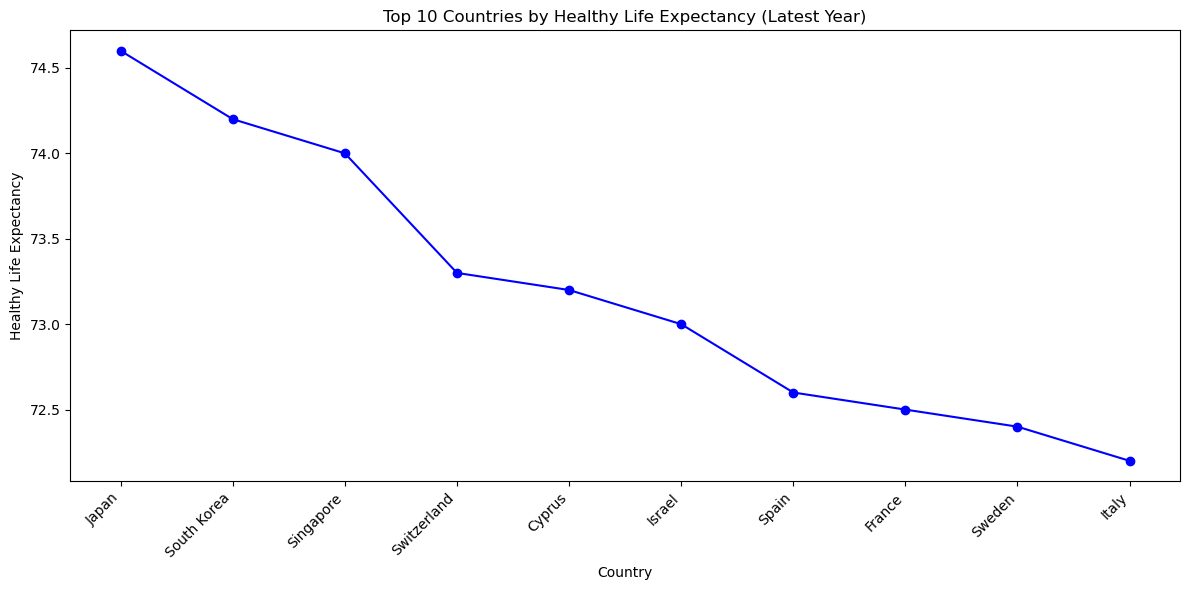

In [14]:
# Plot the top 10 countries by Healthy Life Expectancy in the most recent year

plt.figure(figsize=(12, 6))  # Set the figure size for better readability

# Filter for the most recent year and get top 10 countries by healthy life expectancy
top10 = df[df['year'] == df['year'].max()].sort_values(
    'Healthy life expectancy at birth', ascending=False
).head(10)

# Line plot of countries vs. healthy life expectancy
plt.plot(
    top10['Country name'], 
    top10['Healthy life expectancy at birth'], 
    marker='o', linestyle='-', color='b'
)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add titles and axis labels
plt.title("Top 10 Countries by Healthy Life Expectancy (Latest Year)")
plt.ylabel("Healthy Life Expectancy")
plt.xlabel("Country")

# Adjust layout to prevent label overlap
plt.tight_layout()

# Display the plot
plt.show()

## 📊 7. Bar Chart: Social Support by Country (Top 10 in 2023)

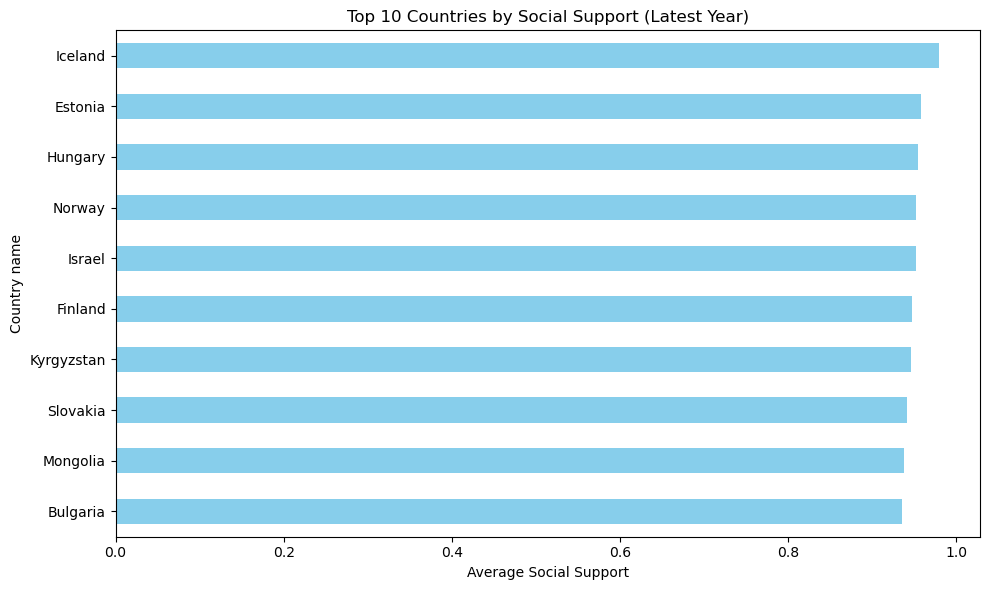

In [16]:
# Plot the Top 10 Countries by Social Support (Latest Year)

plt.figure(figsize=(10, 6))  # Set the figure size

# Filter dataset for the most recent year
df_latest = df[df['year'] == df['year'].max()]

# Calculate average social support by country and select the top 10
avg_social = df_latest.groupby('Country name')['Social support'].mean().sort_values(ascending=False).head(10)

# Create a horizontal bar plot
avg_social.plot(kind='barh', color='skyblue')

# Set axis labels and title
plt.xlabel('Average Social Support')
plt.title('Top 10 Countries by Social Support (Latest Year)')

# Invert y-axis so highest value appears at the top
plt.gca().invert_yaxis()

# Adjust layout to avoid label cutoff
plt.tight_layout()

# Show the plot
plt.show()

## ⚖️ 8. Scatter Plot: GDP vs Life Expectancy by Region

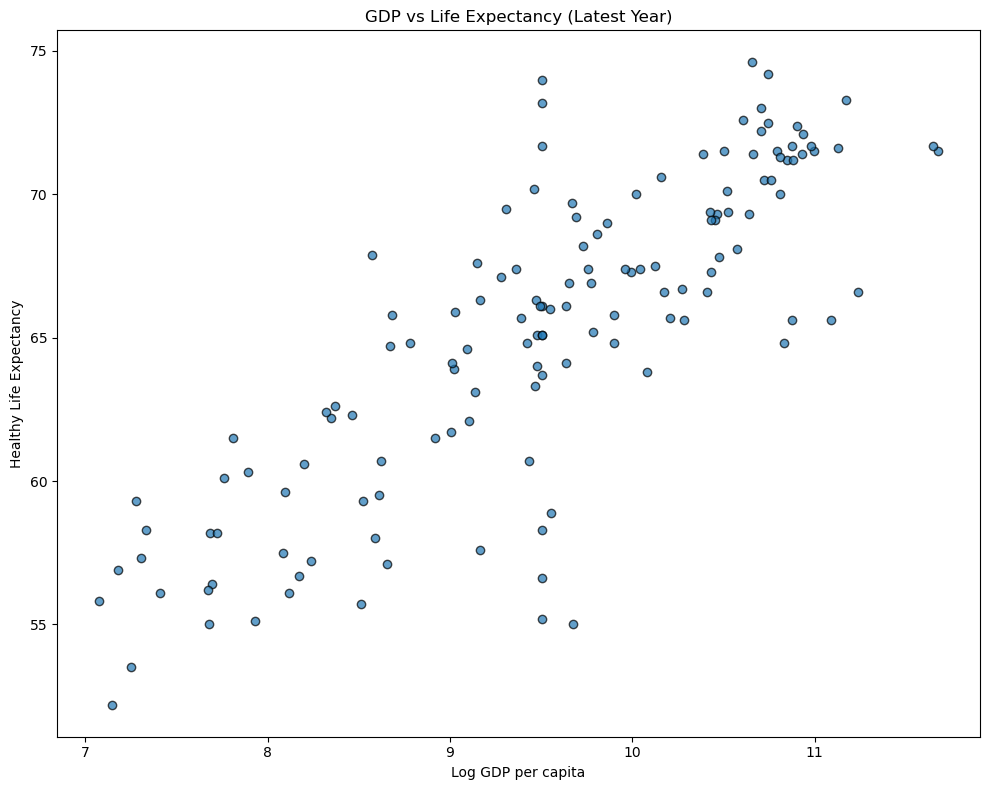

In [18]:
# Scatterplot: Log GDP per Capita vs Healthy Life Expectancy (Latest Year)

plt.figure(figsize=(10, 8))  # Set the figure size

# Filter data for the latest available year
df_latest = df[df['year'] == df['year'].max()]

# Create scatterplot
plt.scatter(
    df_latest['Log GDP per capita'],
    df_latest['Healthy life expectancy at birth'],
    alpha=0.7,  # Set transparency for better overlap visibility
    edgecolors='black'  # Outline each point for clarity
)

# Add labels and title
plt.xlabel('Log GDP per capita')
plt.ylabel('Healthy Life Expectancy')
plt.title('GDP vs Life Expectancy (Latest Year)')

# Optimize layout
plt.tight_layout()

# Display the plot
plt.show()

## 🧮 9. Histogram: Freedom to Make Life Choices

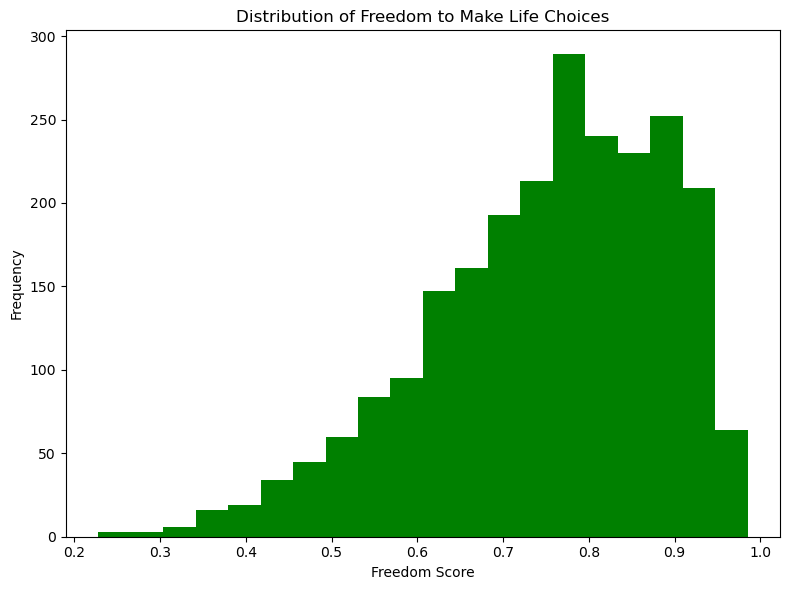

In [20]:
# Histogram: Distribution of Freedom to Make Life Choices

plt.figure(figsize=(8, 6))  # Set the figure size

# Plot histogram with 20 bins and green color
plt.hist(df['Freedom to make life choices'], bins=20, color='green')

# Add title and axis labels
plt.title('Distribution of Freedom to Make Life Choices')
plt.xlabel('Freedom Score')
plt.ylabel('Frequency')

# Adjust layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()

## 🥧 10. Pie Chart: Top 10 Countries by Happiness Score

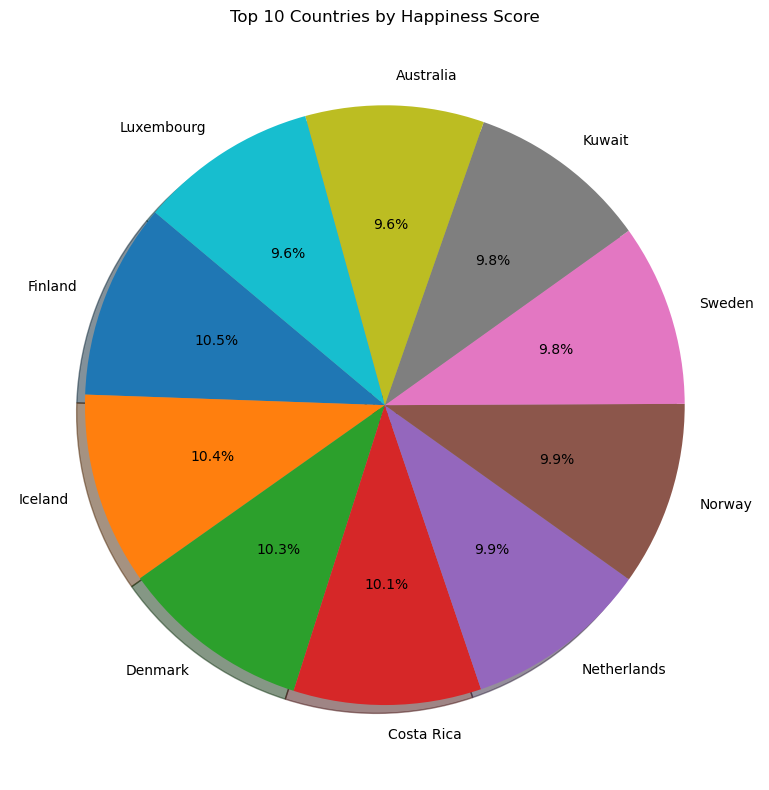

In [22]:
# Pie Chart: Top 10 Countries by Happiness Score (Life Ladder)

# Select the top 10 countries with the highest Life Ladder (happiness) scores
top_happiness = df_latest.nlargest(10, 'Life Ladder')

plt.figure(figsize=(8, 8))  # Set figure size

# Create the pie chart
plt.pie(
    top_happiness['Life Ladder'],  # Values for the pie slices
    labels=top_happiness['Country name'],  # Labels for each slice
    autopct='%1.1f%%',  # Display percentage on slices
    startangle=140,  # Rotate start angle for better layout
    shadow=True  # Add shadow for visual effect
)

# Add a title
plt.title('Top 10 Countries by Happiness Score')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

## 📦 11. Boxplot: Perceptions of corruption by year

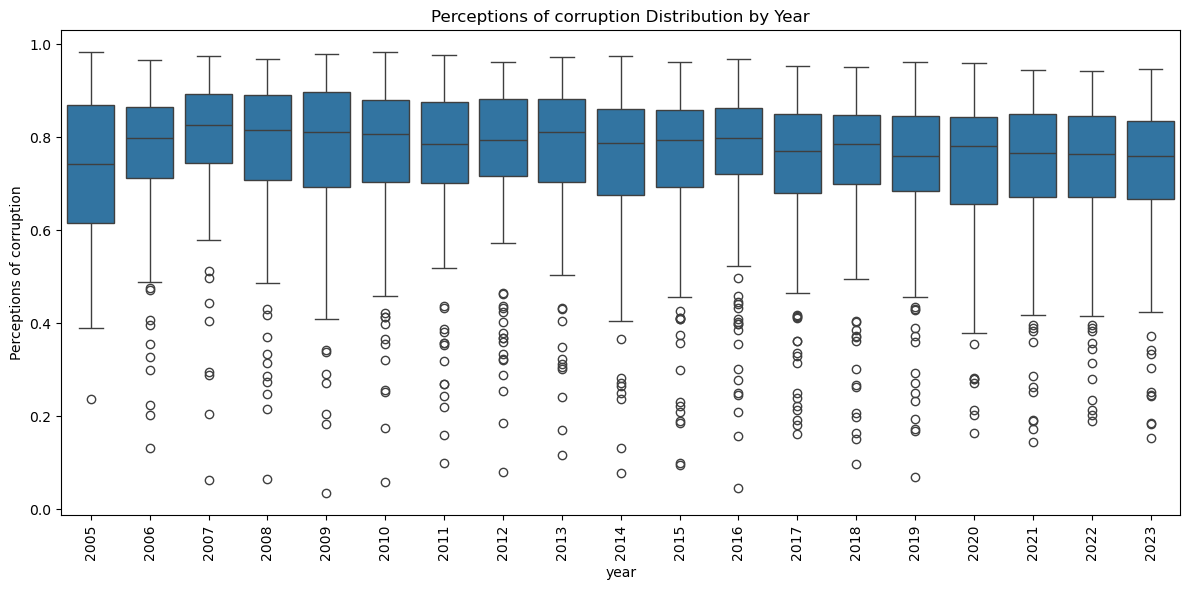

In [30]:
# Boxplot: Perceptions of corruption Distribution by Year

plt.figure(figsize=(12, 6))  # Set figure size for better x-axis label spacing

# Create boxplot to show how generosity scores vary across years
sns.boxplot(x='year', y='Perceptions of corruption', data=df)

# Add plot title
plt.title('Perceptions of corruption Distribution by Year')

# Rotate x-axis labels for clarity
plt.xticks(rotation=90)

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()

## 🌡️ 12. Correlation Heatmap

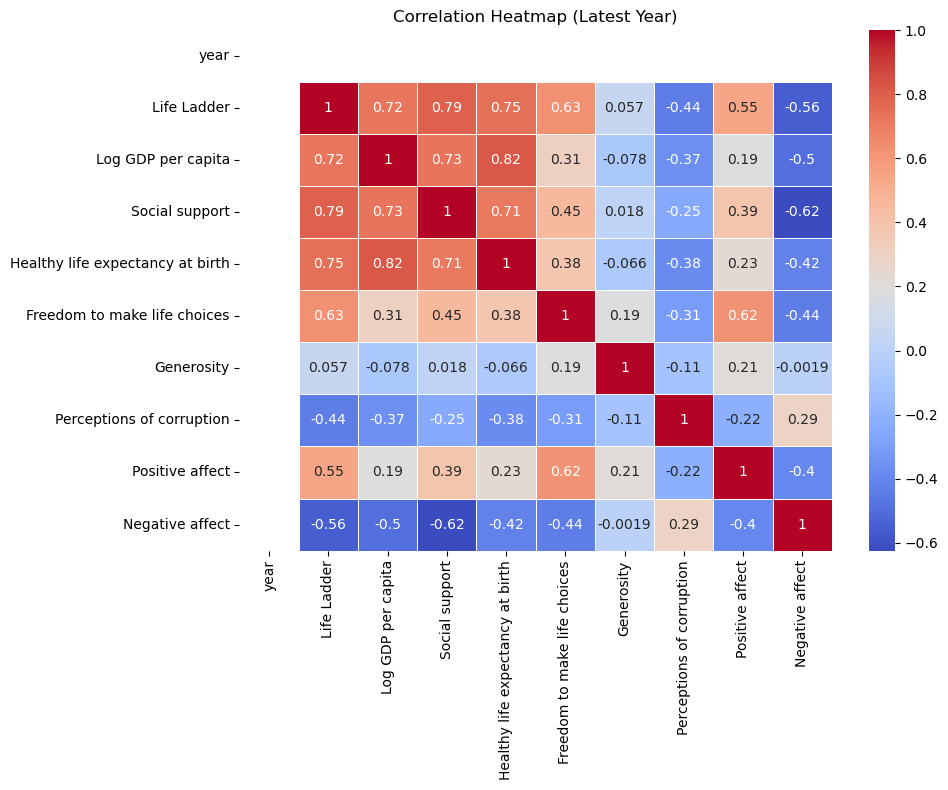

In [32]:
# Correlation Heatmap: Numeric Variables for Latest Year

# Compute correlation matrix for the most recent year only
corr = df[df['year'] == df['year'].max()].select_dtypes(include='number').corr()

# Set figure size for better readability
plt.figure(figsize=(10, 8))

# Plot heatmap using Seaborn
sns.heatmap(
    corr, 
    annot=True,          # Display correlation values in each cell
    cmap='coolwarm',     # Use diverging color palette
    linewidths=0.5       # Add space between cells
)

# Add a descriptive title
plt.title('Correlation Heatmap (Latest Year)')

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()